# Relax Inc.  Take Home Assigment

# Step 1:  Import and Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tqdm import tqdm 

In [2]:
df_engagement = pd.read_csv("takehome_user_engagement.csv")

In [3]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Step 2:  Preliminary Exploration of User Engagement Data

In [4]:
df_engagement['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [5]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### Convert Time_Stamp to DateTime

In [6]:
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

In [7]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
print(df_engagement['time_stamp'].max())
print(df_engagement['time_stamp'].min())

2014-06-06 14:58:50
2012-05-31 08:20:06


Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption .


# Step 3:  Get a list of Active Users

In [9]:
df_engagement['week_no'] = df_engagement['time_stamp'].dt.week

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_17468/1022114868.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_engagement['week_no'] = df_engagement['time_stamp'].dt.week


In [10]:
df2 = df_engagement.groupby(['week_no','user_id'])['time_stamp'].count().reset_index(name="week_count")

In [11]:
df2.head()

,week_no,user_id,week_count
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [12]:
df2 = df2[df2['week_count'] > 2]

In [13]:
unique_users =  df2['user_id'].unique()
len(unique_users)

1445

In [14]:
print(1445/12000)


0.12041666666666667


OK So we have a list of unique users called unique_users.  It appears there are 1,445 unique users or about 12% of the total

#  Step 4:  Add new variable 'Active User ' to Takehome Users 

In [15]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
df_users['active'] = ''

df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,


In [16]:
for item in range(len(df_users)):
    if df_users['object_id'].iloc[item] in unique_users:
        df_users['active'].iloc[item] = 1
    else:
        df_users['active'].iloc[item] = 0

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df_users['active'] = df_users['active'].astype(str).astype(int)

In [18]:
df_users['active'].value_counts()

0    10555
1     1445
Name: active, dtype: int64

# Step 5: Exploratory Data Analysis

In [19]:
df_users['creation_time'].fillna('01/01/1901', inplace = True)
df_users['last_session_creation_time'].fillna('01/01/1901', inplace = True)

df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'])

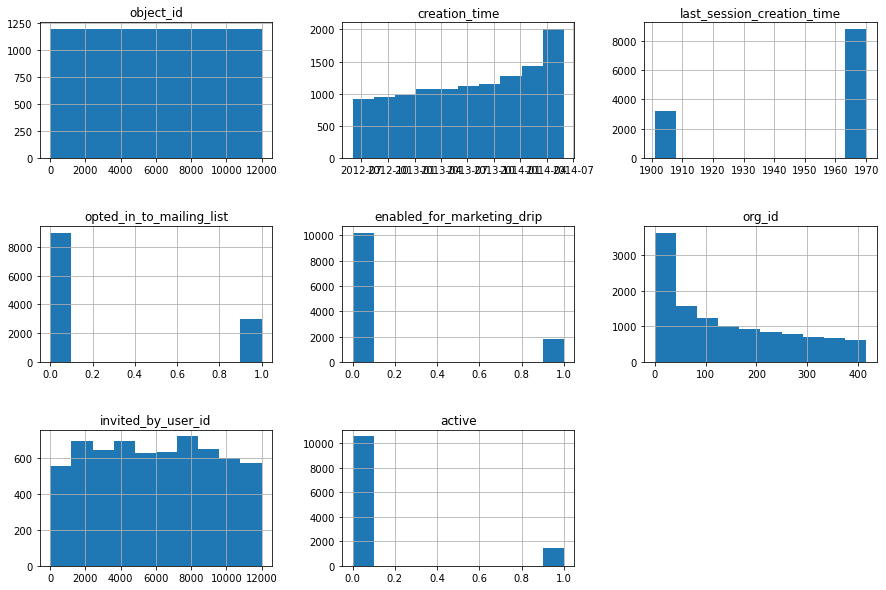

In [20]:
df_users.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5)
plt.savefig('review.of.variables.png')

In [21]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  active                      12000 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(4), 

### Last_session_creation time

Last_session_creation_time would be a great variable BUT about a third of the data is missing and the other data I am not doing a good job of making sense of.  At this time I will make the judgment to drop this column.

In [22]:
df_users.drop(columns = ['last_session_creation_time'], axis = 1, inplace = True)

### Email

In [23]:
df_users['domain'] = ''

In [24]:
from urllib import parse

for item in range(len(df_users)):
    df_users['domain'].iloc[item]  = parse.splituser(df_users['email'].iloc[item])[1]

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_17468/3887124336.py:4: DeprecationWarning: urllib.parse.splituser() is deprecated as of 3.8, use urllib.parse.urlparse() instead
  df_users['domain'].iloc[item]  = parse.splituser(df_users['email'].iloc[item])[1]


In [25]:
df_users['domain'].value_counts().head(8)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
oqpze.com            2
Name: domain, dtype: int64

In [26]:
for item in range(len(df_users)):
    if df_users['domain'].iloc[item] == 'gmail.com':
        pass
    elif df_users['domain'].iloc[item] == 'yahoo.com':
        pass
    elif df_users['domain'].iloc[item] == 'jourrapide.com':
        pass
    elif df_users['domain'].iloc[item] == 'cuvox.de':
        pass
    elif df_users['domain'].iloc[item] == 'gustr.com':
        pass
    elif df_users['domain'].iloc[item] == 'hotmail.com':
        pass
    else:
        df_users['domain'].iloc[item] = 'OTHER'

In [27]:
df_users.head(3)

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,gustr.com


In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   active                      12000 non-null  int32         
 10  domain                      12000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), 

In [29]:
df_users['invited_by_user_id'].fillna(0, inplace = True)

In [30]:
print(df_users['creation_time'].max())
print(df_users['creation_time'].min())

2014-05-30 23:59:19
2012-05-31 00:43:27


Create New Varible 'days since creation' and convert to number so we can use it in a regression

In [31]:
df_users['time_delta'] = (df_users['creation_time'].max() - df_users['creation_time']).dt.days

In [32]:
df_users.drop(columns = ['creation_time'], axis = 1, inplace = True)

In [33]:
df_users.drop(columns = ['email'], axis = 1, inplace = True)

# Create Dummy Variables

In [34]:
df_users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [35]:
df_users = pd.get_dummies(df_users, columns = ['creation_source', 'domain'], drop_first = True)

In [36]:
df_users['active'] = df_users['active'].astype(str).astype(int)

In [37]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   object_id                           12000 non-null  int64  
 1   name                                12000 non-null  object 
 2   opted_in_to_mailing_list            12000 non-null  int64  
 3   enabled_for_marketing_drip          12000 non-null  int64  
 4   org_id                              12000 non-null  int64  
 5   invited_by_user_id                  12000 non-null  float64
 6   active                              12000 non-null  int32  
 7   time_delta                          12000 non-null  int64  
 8   creation_source_ORG_INVITE          12000 non-null  uint8  
 9   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 10  creation_source_SIGNUP              12000 non-null  uint8  
 11  creation_source_SIGNUP_GOOGLE_AUTH  12000

# Random Forest Feature Importance

In [38]:
y = df_users['active']
df_X = df_users.drop(columns=['active'])
X = df_X.drop(columns = ['name'])

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances for Ultimate Challenge')

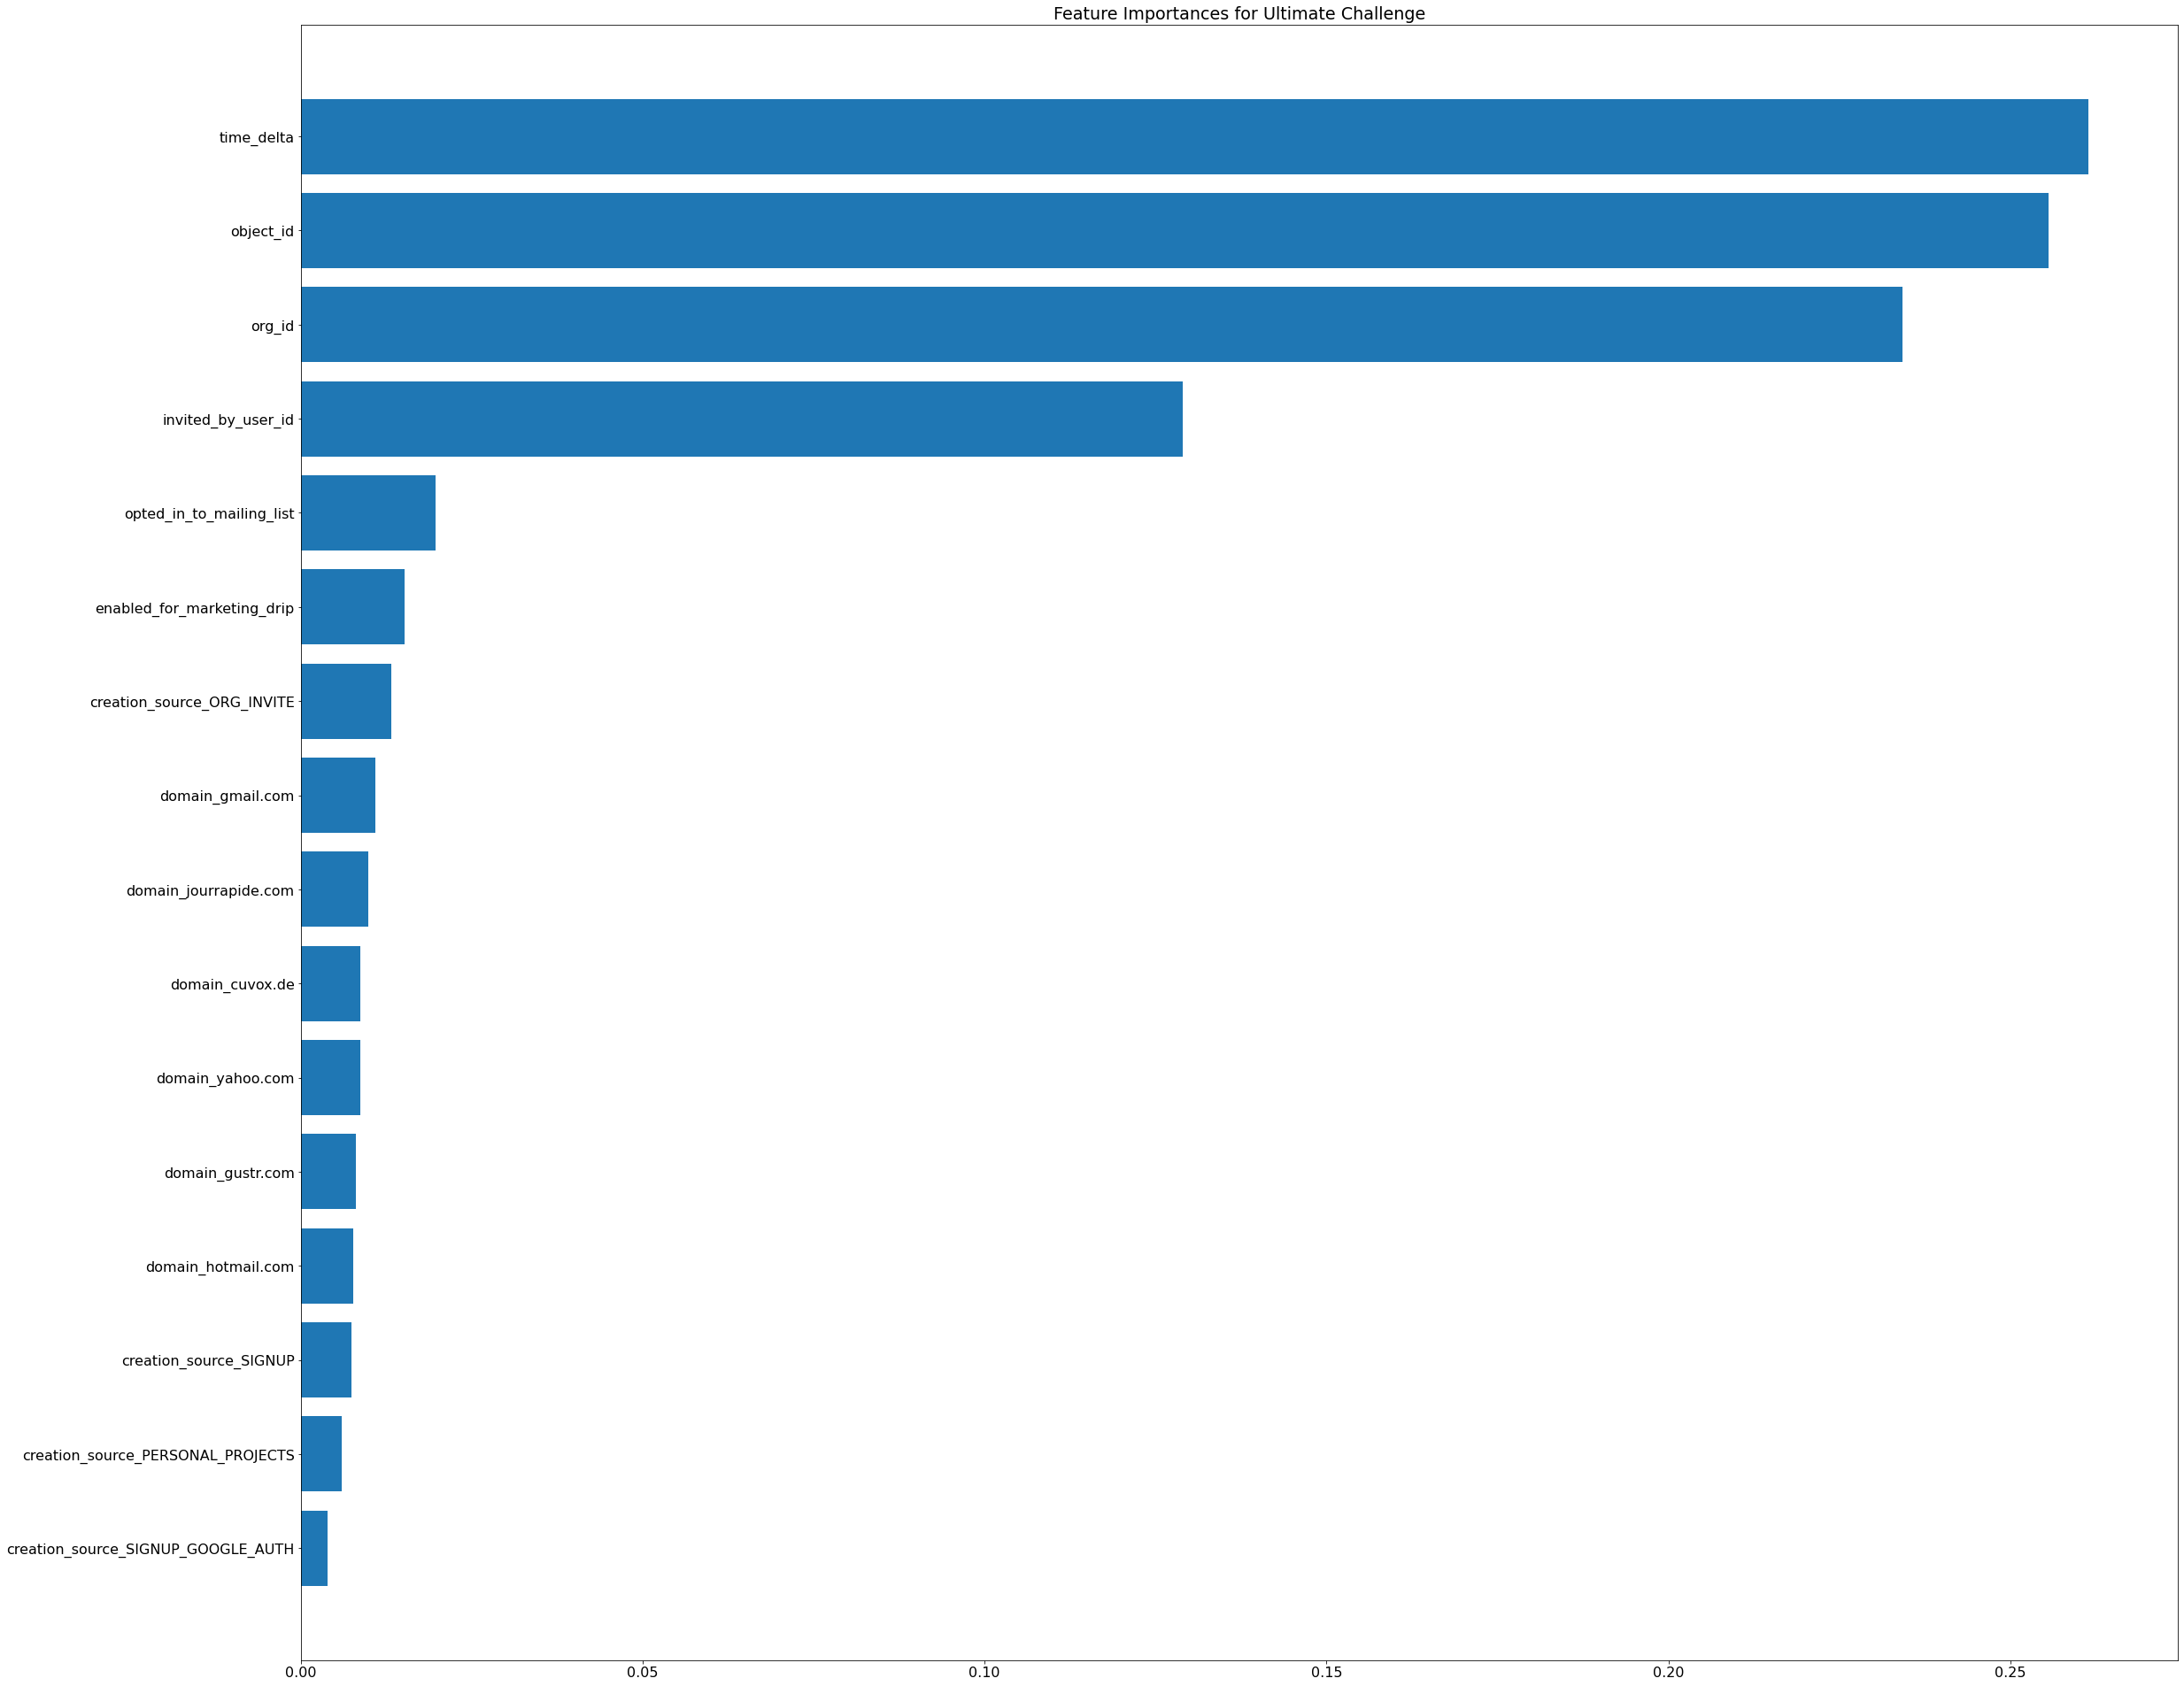

In [40]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 16})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ultimate Challenge")

# Modeling

#### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

#### Fit to Random Forest Classifier

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

#### Evaluataion Metrics

In [44]:
from sklearn import tree, metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Accuracy: 0.8756666666666667
Balanced accuracy: 0.5002984430696283
Precision score 0.13333333333333333
Recall score 0.9950720242608037


In [45]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2
False Positives: 13
True Negatives: 2625
False Negatives: 360


In [46]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted Inactive', "Predicted Active"], index=['Actual Inactive', 'Actual Active'])

,Predicted Inactive,Predicted Active
Actual Inactive,2625,13
Actual Active,360,2


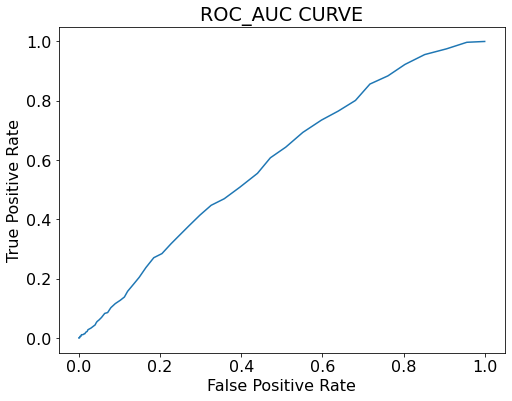

In [47]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC_AUC CURVE")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Commentary
Well, the accuracy and recall score look good at first glance but we are not really doing a good job of predicting the 'Active' accounts.  It looks like this is due to us having an UNBALANCED data set.  We can recall that only 1,445 of our 12,000 accounts are 'Active'.  So even if we just assigned ALL the data to 'inactive' we would have an accuracy of around 88%.  

# Revisit with a balanced data set

#### Make a balanced data set by including only 1,445 inactive users

In [48]:
df1 = df_users[df_users['active'] == 1]

In [49]:
df2 = df_users[df_users['active'] == 0].head(1445)

In [50]:
df3 = df1.append(df2)

In [51]:
df3['active'].value_counts()

1    1445
0    1445
Name: active, dtype: int64

# Random Forest Feature Importance

In [52]:
y = df3['active']
df_X = df3.drop(columns=['active'])
X = df_X.drop(columns = ['name'])

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances for Ultimate Challenge')

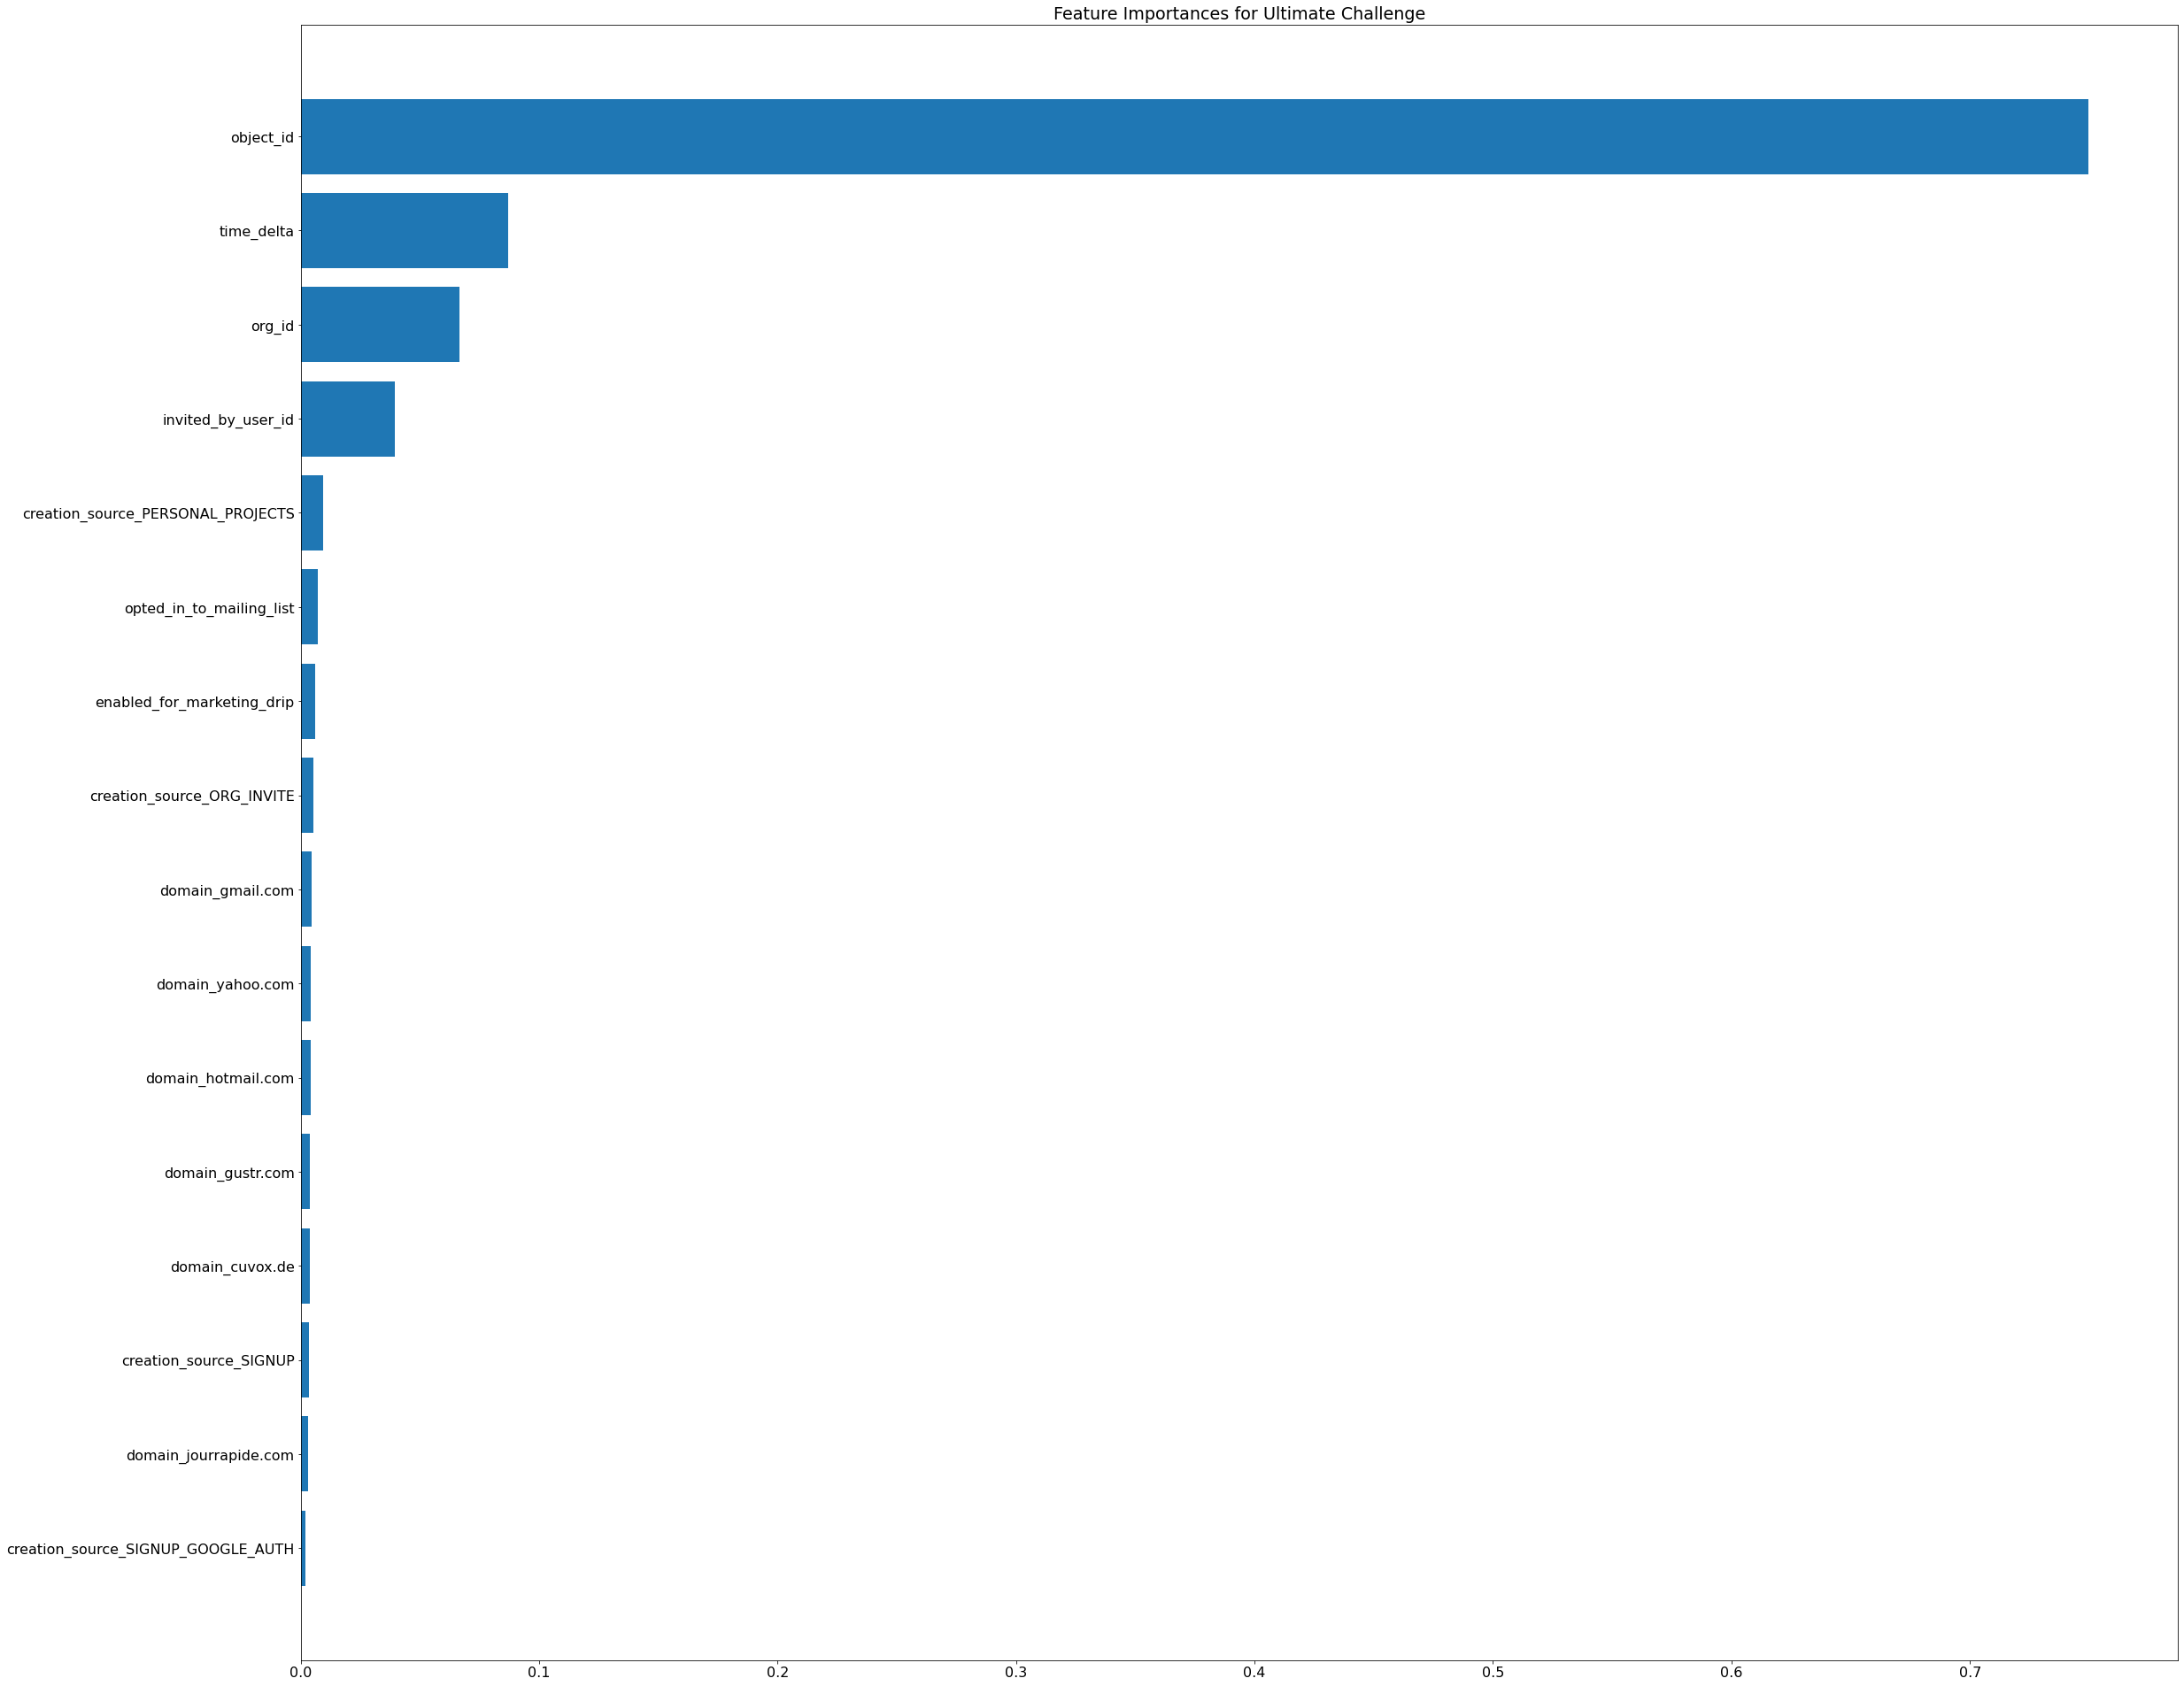

In [54]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 16})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ultimate Challenge")

# Modeling

#### Train Test Split

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

#### Evaluation Metrics

In [58]:
from sklearn import tree, metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Accuracy: 0.9294605809128631
Balanced accuracy: 0.933420365535248
Precision score 1.0
Recall score 1.0


In [59]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 332
False Positives: 0
True Negatives: 340
False Negatives: 51


In [60]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted Inactive', "Predicted Active"], index=['Actual Inactive', 'Actual Active'])

,Predicted Inactive,Predicted Active
Actual Inactive,340,0
Actual Active,51,332


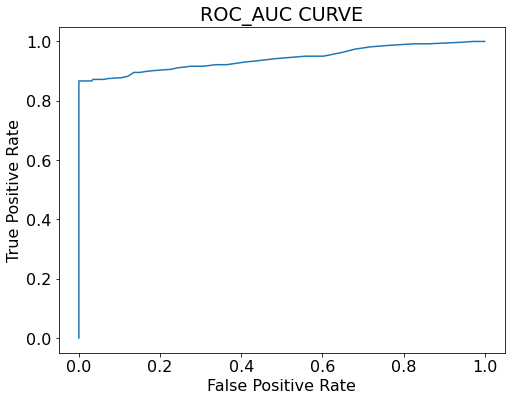

In [61]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC_AUC CURVE")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

For this assigment I evaluated which of the users should be considered 'active' and which are 'inactive' based on the criteria that an 'active' user has logged into the site on three seperate days in a given week.

Based on my review of the data only 1,445 of a total of 12,000 users were considered active.

An active user variable was added to our user dataframe based on these findings.
Some of the data was cleaned into a format more usable for a regression analysis.  

Once our data was cleaned the Random Forest Feature Importance was run giving us the features that are most important in terms of predicting whether an account was active or not.

The dataset was then split into a training and a testing set and modeled using a Random Forest Classifier.
Based on metrics such as accuracy and recall, the model appeared to perform well.
However, a closer look revealed that the model did a good job of predicting the 'inactive' but a very poor job of predicting the 'active' users.  Since the dataset was so imbalanced where a very small percentage of the data was from 'active' users the metrics looked good despite it doing a poor job of predicting which users would become active.

In an attempt to remedy this issue, I decided to under sample the 'inactive' users to artificially produce a balanced data set.

To do so I just selected ALL of the 'active' users and 1,445 of the 'inactive' users.

Once the dataset was balanced I reproduced the Random Forest Feature Importance and modeled the data again using the Random Forest Classifier.  The accuracy and recall remained high but the Random Forest Classifier did a much better job of predicting the 'active' users.
